In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
def parser(time_data):
    return pd.datetime.strptime('2017-'+time_data,'%Y-%d-%m %H:%M:%S')
data1 = pd.read_csv('../data/cm_monitor.csv',index_col=0, parse_dates=[0], date_parser=parser)
data2 = pd.read_csv('../data/cmserver11-30.csv',index_col=0, parse_dates=[0], date_parser=parser)

In [14]:
data3 = pd.read_csv('../data/namenode_monitor-1130.csv',index_col=0, parse_dates=[0], date_parser=parser)

In [3]:
data1 = data1[::60]
data2 = data2[::60]

In [4]:
data = pd.concat([data1,data2])
data = data.drop('hiq',1)
data.columns.values
data = data.rename(columns={'cpu process':'top_cpu','memory process':'top_mem'})
#  df.rename(columns={'col_1': 'col_a'})
data['top_cpu'] = data['top_cpu'].str.partition('/')[0]
data['top_mem'] = data['top_mem'].str.partition('/')[0]

array(['usr', 'sys', 'idl', 'wai', 'siq', 'used', 'buff', 'cach', 'free',
       'recv', 'send', 'read', 'writ', 'cpu process', 'memory process'], dtype=object)

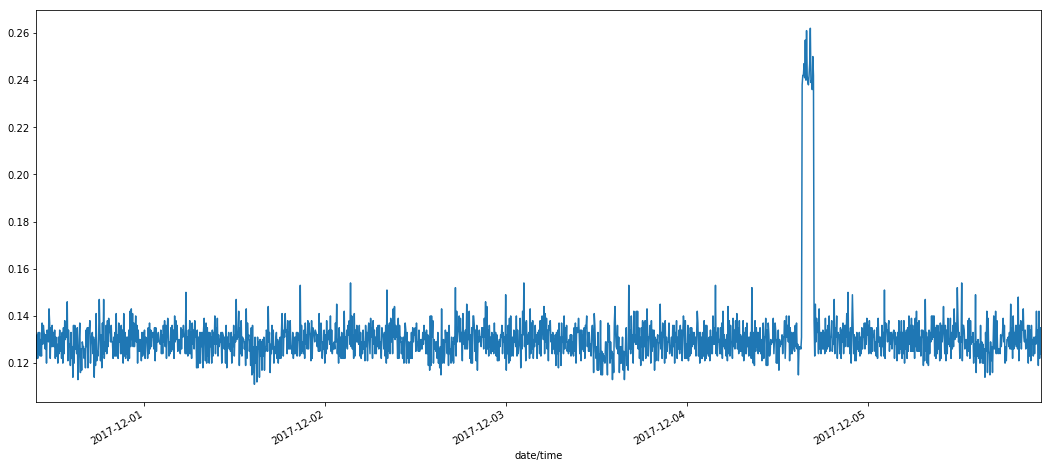

In [35]:
data3[:8000][::5].usr.plot()
plt.gcf().set_size_inches(18,8)
plt.show()

In [30]:
data3.loc[data3['usr']>0.2]

,usr,sys,idl,wai,hiq,siq,used,buff,cach,free,recv,send,read,writ,cpu process,memory process
date/time,,,,,,,,,,,,,,,,
2017-12-04 15:14:40,0.261,0.098,99.612,0.029,0.0,0.001,1.894683e+09,218877952.0,3.725140e+09,1.083448e+10,7651.950,13017.783,0.0,2.417,java / 0%,java / 716443648%
2017-12-04 15:15:40,0.246,0.098,99.630,0.025,0.0,0.001,1.894449e+09,218877952.0,3.731567e+09,1.082828e+10,3973.783,7962.500,0.0,2.883,java / 0%,java / 716443648%
2017-12-04 15:16:40,0.255,0.102,99.618,0.025,0.0,0.000,1.893917e+09,218877952.0,3.737973e+09,1.082241e+10,3325.633,7381.100,0.0,2.317,java / 0%,java / 716439552%
2017-12-04 15:17:40,0.238,0.097,99.642,0.023,0.0,0.000,1.894224e+09,218877952.0,3.744408e+09,1.081567e+10,3271.483,7263.867,0.0,2.433,java / 0%,java / 716443648%
2017-12-04 15:18:39,0.241,0.107,99.627,0.025,0.0,0.000,1.888793e+09,218877952.0,3.541082e+09,1.102442e+10,3296.400,7331.817,0.0,2.417,java / 0%,java / 716439552%
2017-12-04 15:19:40,0.230,0.099,99.650,0.021,0.0,0.001,1.889599e+09,218877952.0,3.547501e+09,1.101720e+10,3269.517,7293.217,0.0,2.217,java / 0%,java / 716443648%
2017-12-04 15:20:40,0.266,0.101,99.607,0.026,0.0,0.000,1.889407e+09,218877952.0,3.553935e+09,1.101096e+10,3649.833,7453.583,0.0,2.983,java / 0%,java / 716443648%
2017-12-04 15:21:39,0.236,0.103,99.635,0.025,0.0,0.001,1.889485e+09,218877952.0,3.560370e+09,1.100444e+10,3601.500,7426.300,0.0,3.100,java / 0%,java / 716439552%
2017-12-04 15:22:40,0.242,0.102,99.634,0.022,0.0,0.000,1.890050e+09,218877952.0,3.566797e+09,1.099745e+10,3331.800,7311.250,0.0,2.483,java / 0%,java / 716443648%


In [17]:
data3.shape

(10072, 16)

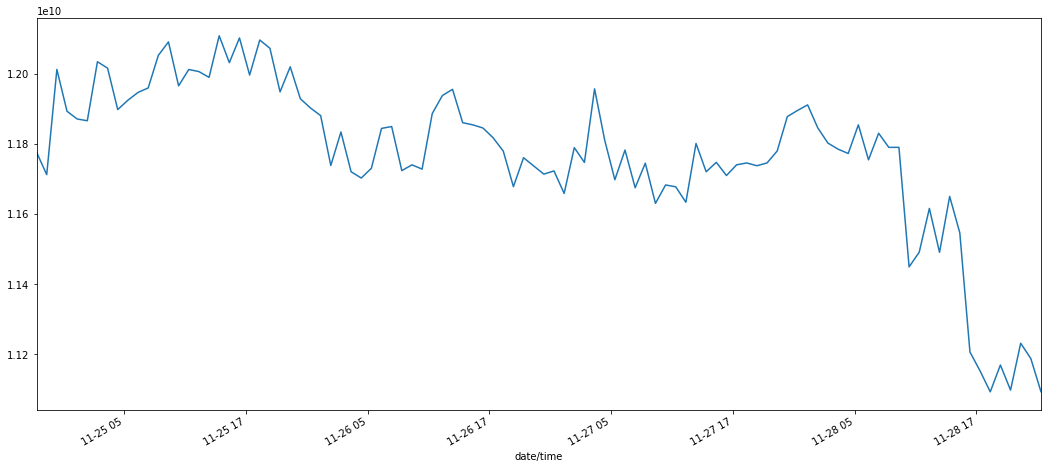

In [12]:
data_200 = data[:100]
data_200.free.plot()
plt.gcf().set_size_inches(18,8)
plt.show()